### Control Digital en Sistemas Embebidos - MSE - PRACTICA 1

In [ ]:
!pipenv install slycot
!pipenv install control
!pipenv install matplotlib

In [2]:
import numpy as np
from scipy.linalg import expm
from control import *
import matplotlib.pyplot as plt

In [3]:
r_1 = 10e3
c_1 = 100e-9
r_2 = 10e3
c_2 = 200e-9

**1)** Crear una planta mediante los coeficientes del denominador y numerador en el dominio continuo.

**Opcion 1:** Realizar el desarrollo matematico de la ecuación diferencial del circuito y obtener la función transferencia en el dominio de Laplace

In [4]:
s = tf('s')
hs_1 = 1 / ((r_1*c_1*r_2*c_2)*s*s + (r_1*c_1+r_1*c_2+r_2*c_2)*s + 1)
num_1, den_1 = tfdata(hs_1)
num_1, den_1


([[array([1])]], [[array([2.e-06, 5.e-03, 1.e+00])]])

**Opcion 2:** Realizar el desarrollo matematico de la ecuación diferencial del circuito para obtener los coeficientes del numerador y denominador

In [5]:
num_2 = np.array([1])
den_2 = np.array([(r_1*c_1*r_2*c_2), (r_1*c_1+r_1*c_2+r_2*c_2), 1])
hs_2 = tf(num_2, den_2)
hs_2

TransferFunction(array([1]), array([2.e-06, 5.e-03, 1.e+00]))

**2)** Crear una planta mediante las matrices de estado (A, B, C y D) que la definen.

Se pueden obtener los coeficientes de las ecuaciones de estado a partir de los coeficientes del numerador y denominador, y la funcion 'tf2ss'.

In [6]:
ss_1 = tf2ss(num_1, den_1)
ss_1

StateSpace(array([[-2.5e+03, -5.0e+05],
       [ 1.0e+00,  0.0e+00]]), array([[1.],
       [0.]]), array([[     0., 500000.]]), array([[0.]]))

Se pueden obtener los coeficientes del numerador y denominador de la funcion transferencia a partir de los coeficientes de estado con 'ss2tf'

In [7]:
hs_2 = ss2tf(ss_1)
hs_2

TransferFunction(array([500000.]), array([1.0e+00, 2.5e+03, 5.0e+05]))

In [8]:
hs_3 = ss2tf(ss_1.A, ss_1.B, ss_1.C, ss_1.D)
hs_3

TransferFunction(array([500000.]), array([1.0e+00, 2.5e+03, 5.0e+05]))

También puede obtenerse la función transferencia a partir de los coeficientes de las ecuaciones de estado con: 

$H_{s} = C (sI − A)^{−1} B + D$

In [9]:
s = tf('s')
hs_3 = ss_1.C / (np.multiply(np.eye(ss_1.A.shape[0]), s) - ss_1.A) * ss_1.B + ss_1.D
hs_3

array([[TransferFunction(array([0.]), array([1.])),
        TransferFunction(array([500000.]), array([500000.]))],
       [TransferFunction(array([0.]), array([1.])),
        TransferFunction(array([0.]), array([1.]))]], dtype=object)

**3)** Discretizar las anteriores plantas

In [10]:
h = 0.1

**Opcion 1:** Discretizar utilizando la funcion 'c2d'

In [11]:
hz_1 = c2d(hs_1, h, 'zoh')
numz_1, denz_1 = tfdata(hz_1)
ss_2 = tf2ss(numz_1, denz_1)
ss_2

StateSpace(array([[ 3.01467361e-10, -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00]]), array([[1.],
       [0.]]), array([[1.00000000e+00, 3.20578008e-11]]), array([[0.]]))

**Opcion 2:** Discretizar utilizando las funciones para obtener las ecuaciones de estado discretas a partir de los coeficientes de las ecuaciones en tiempo continuo.

In [ ]:
phi_2 = expm(ss_1.A * h)
rho_2 = (expm(ss_1.A * h) - expm(ss_1.A * 0)) / ss_1.A * ss_1.B
cz_2 = ss_1.C
dz_2 = 0

ss2tf(phi_2, rho_2, cz_2, dz_2)
rho_2

**4)** Evaluar la distribución de polos y ceros de las plantas continuas y discretas, también su respuesta en frecuencia.

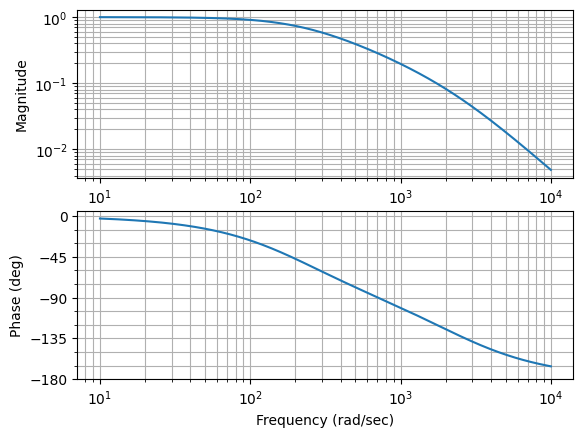

In [13]:
bode_plot(hs_1);

In [14]:
zeros(hs_1), poles(hs_1)

(array([], dtype=complex128), array([-2280.7764064+0.j,  -219.2235936+0.j]))

In [15]:
zeros(hz_1), poles(hz_1)

(array([-3.20578008e-11+0.j]), array([3.01467361e-10+0.j, 0.00000000e+00+0.j]))

(array([3.01467361e-10+0.j, 0.00000000e+00+0.j]), array([-3.20578008e-11+0.j]))

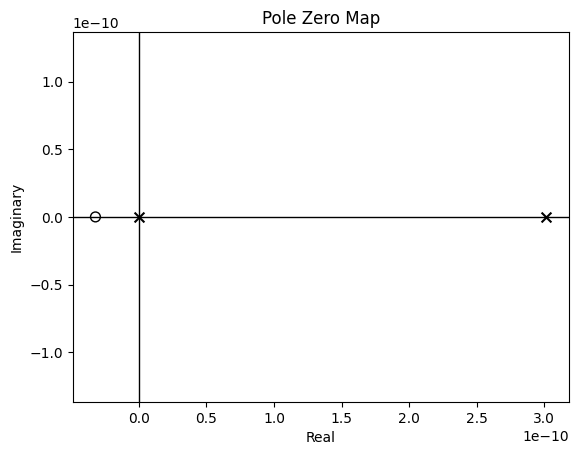

In [16]:
pzmap(hz_1)

**5)** Evaluar la respuesta al escalón de todas las plantas (continuas y discretas)

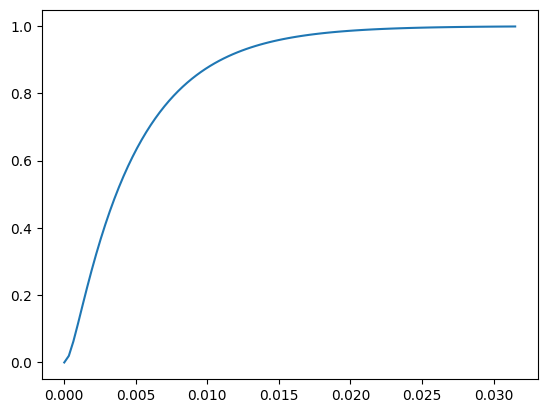

In [17]:
t, hs_out = step_response(hs_1)
plt.plot(t, hs_out);

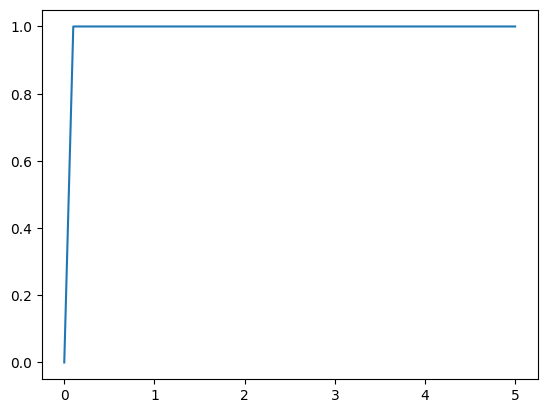

In [18]:
t, hz_out = step_response(hz_1)
plt.plot(t, hz_out);

**6)** Crear una función que aplique la ecuación de recurrencia de un filtro a una entrada cualquiera. (Ver función filter de Matlab).

In [ ]:
def funcion_recurrencia(num: np.ndarray, den: np.ndarray, input: np.ndarray) -> np.ndarray:
    # TODO
    return input

**7)** Compare las respuestas al escalón discretas con el comando step frente a la creada con la ecuación de recurrencia

In [ ]:
t = np.linspace(h, h * 100, 100)
u = np.concatenate((np.zeros(int(len(t) / 2)), np.ones(int(len(t) / 2))), axis=None)

In [ ]:
y_1 = funcion_recurrencia(numz_1, denz_1, u)
t_2, y_2 = input_output_response(tf2io(hz_1), t, u)

In [ ]:
p_1 = plt.plot(y_1)
p_2 = plt.plot(y_2)
plt.ylabel('u(t)')
plt.title('Respuesta al Escalon')
plt.legend((p_1[0], p_2[0]), ('y1(t)', 'y2(t)'));